In [1]:
# Load the Catchment data
from Reader import load_catchments
catchments = load_catchments('catchments_data.pkl')

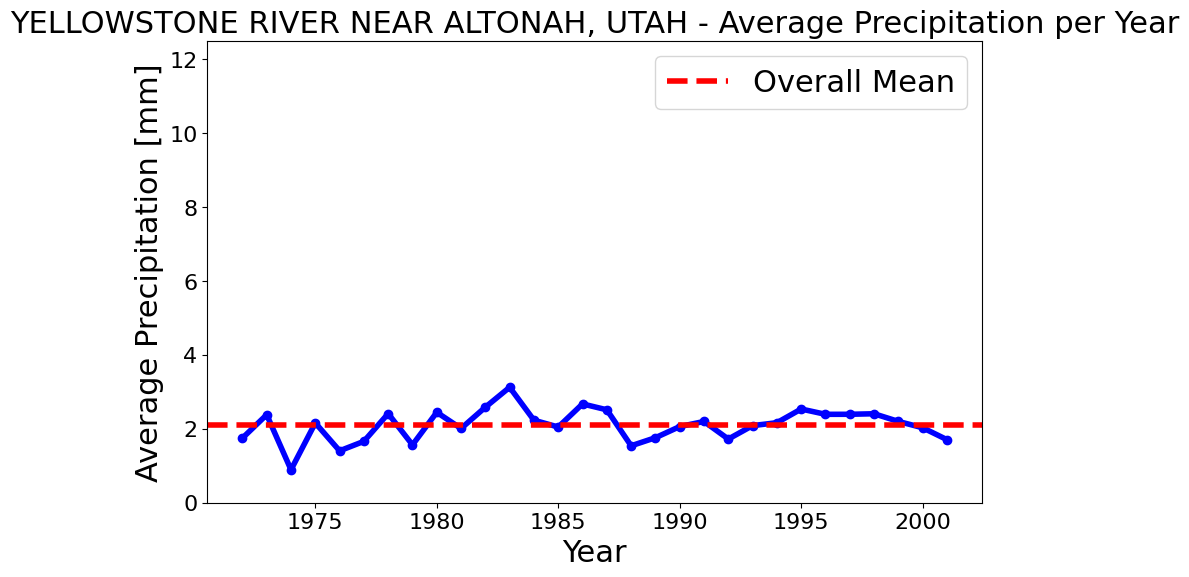

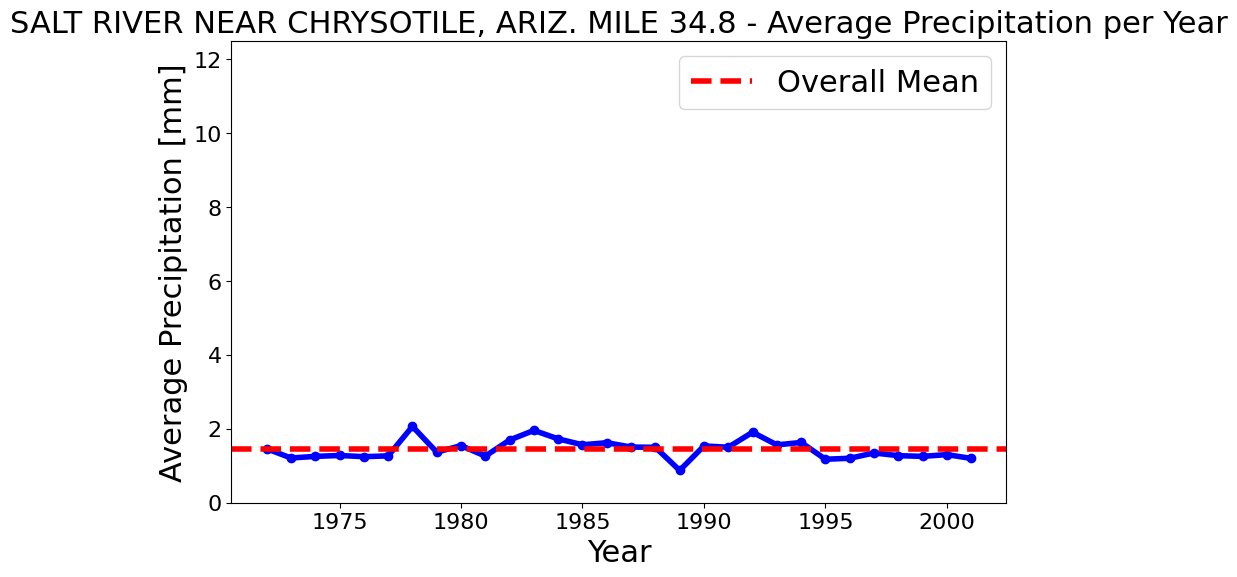

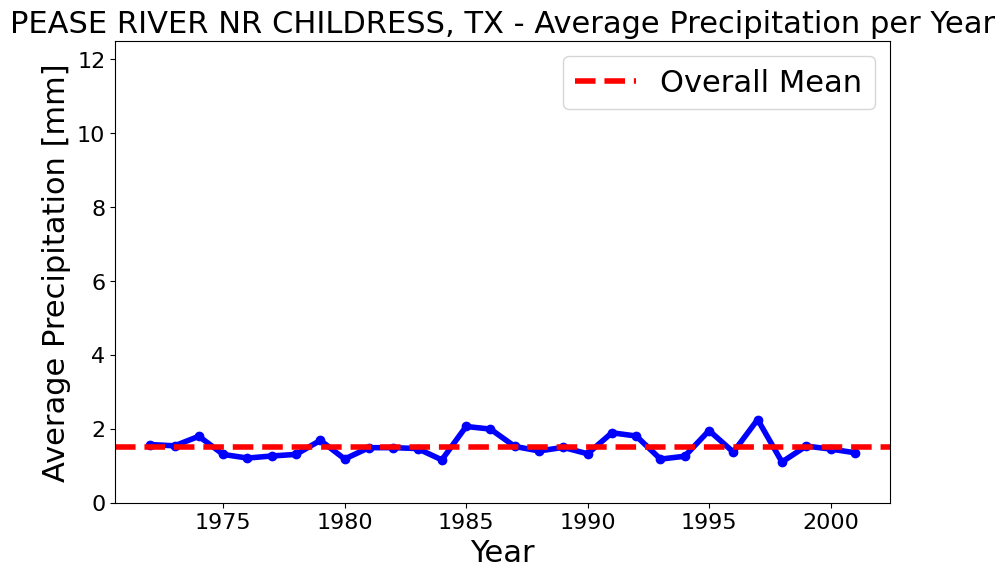

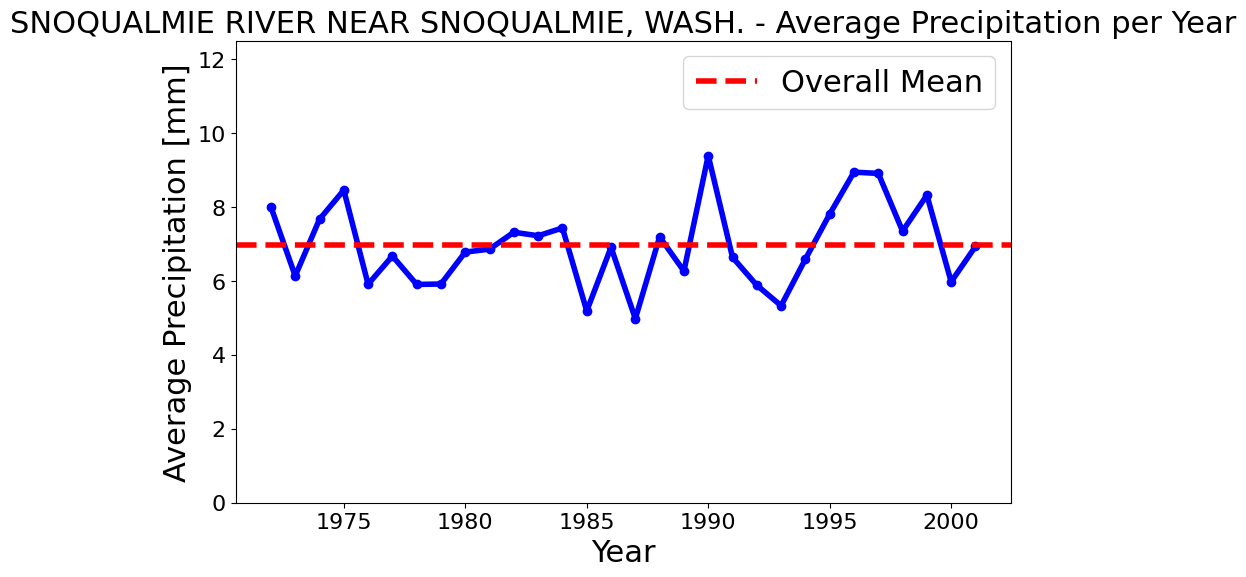

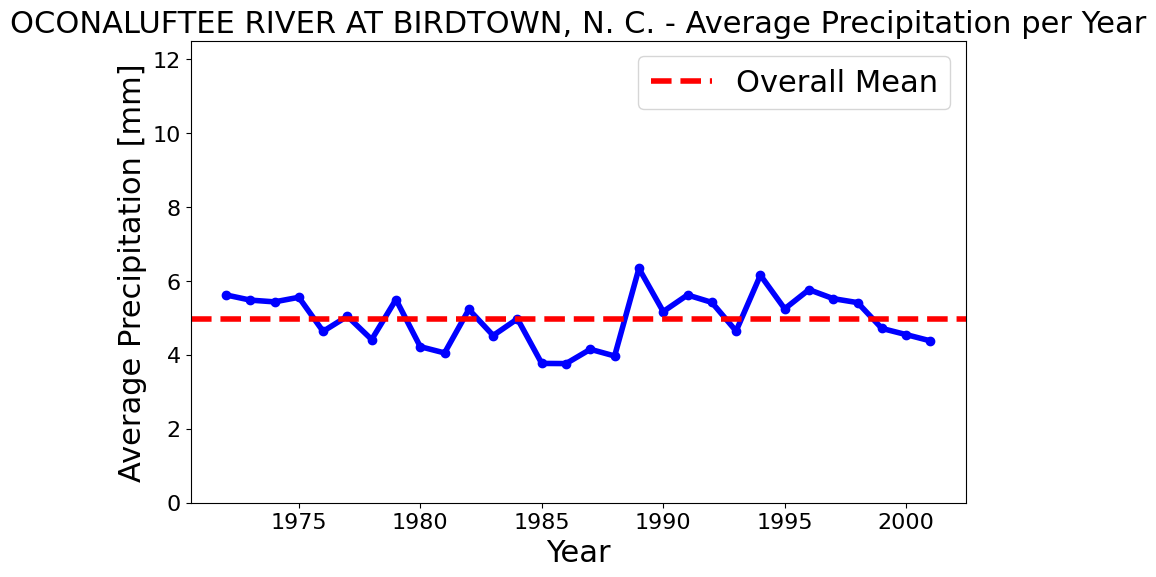

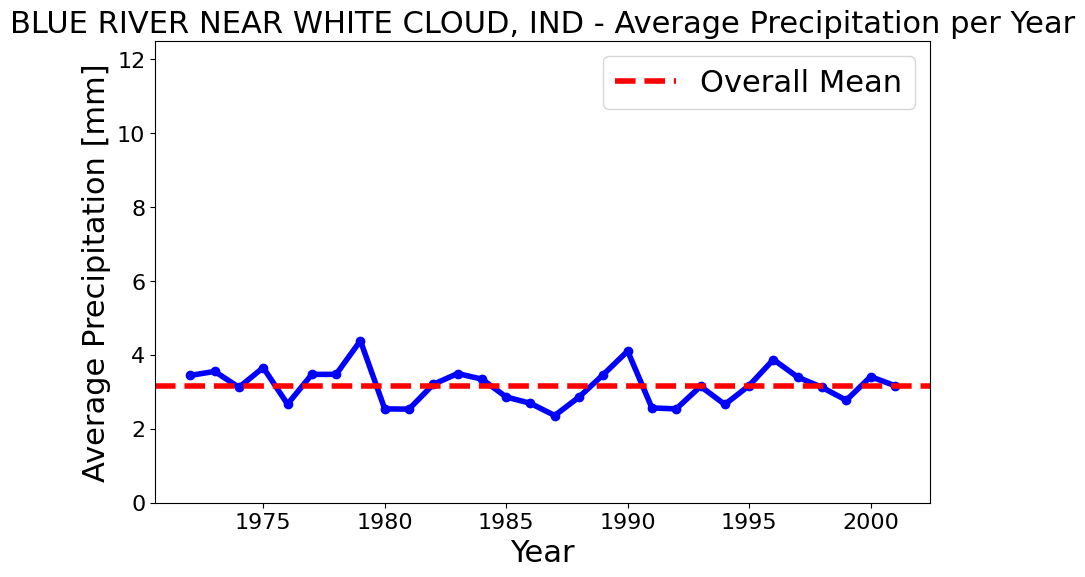

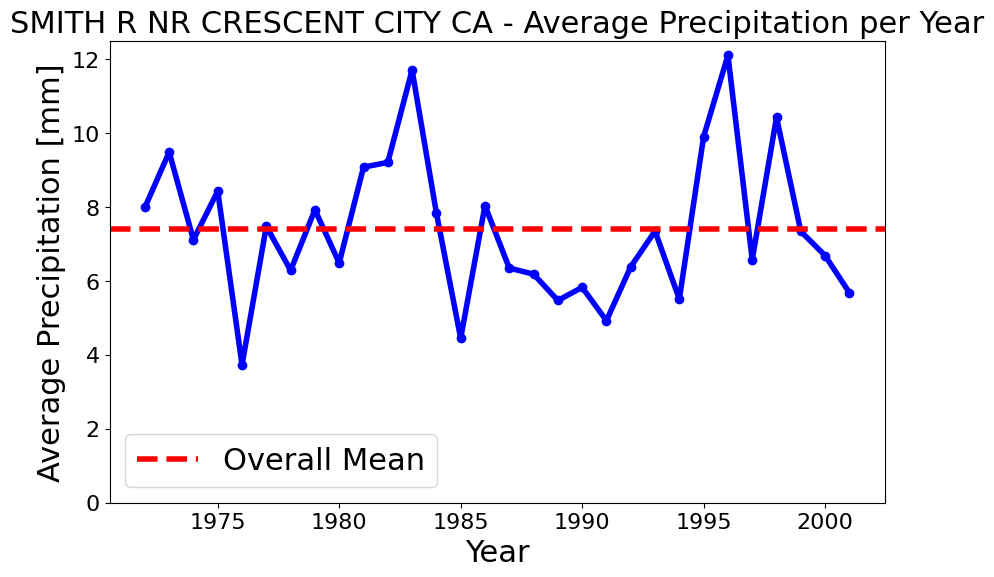

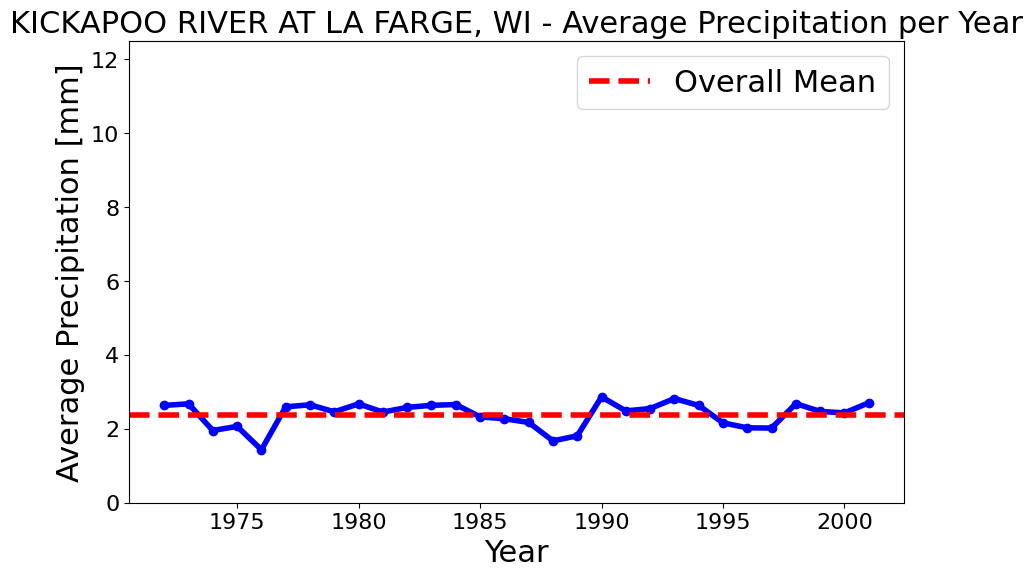

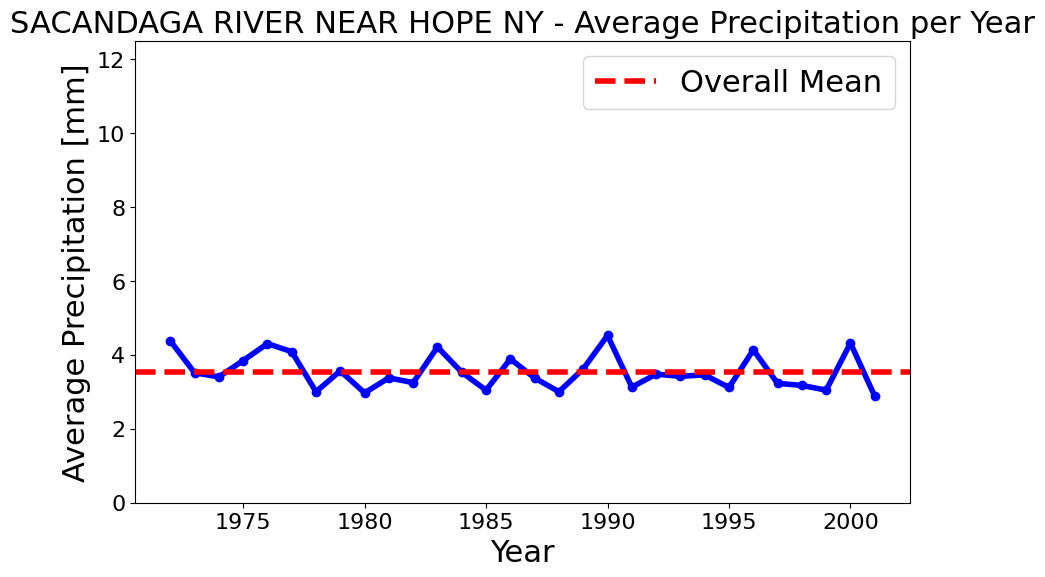

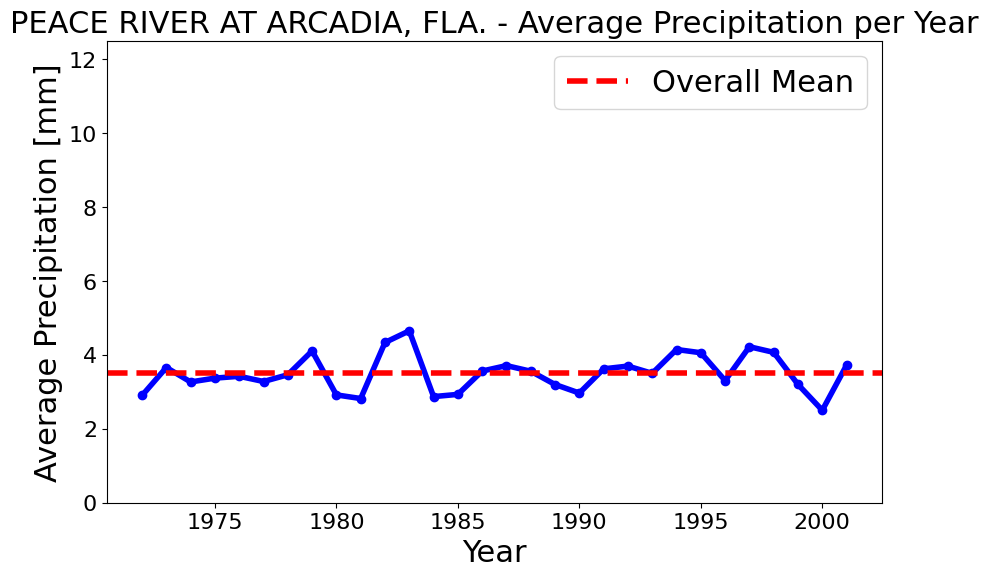

In [2]:
catchment_indexes = [0,1,10,11,12,13,14,16,23,24]
for ci in catchment_indexes:
    catchments[ci].plot_yearly_data(data_type='precipitation', average_over_all_years=True)  # Plotting precipitation 

In [3]:
for ci in catchment_indexes:
    catchments[ci].plot_max_values_each_year('total_streamflow')  # Plotting the maximum precipitation value for each year

# catchment.plot_yearly_data(1990, 'potential_evaporation')  # Plotting potential evaporation for the year 1990

# catchment.plot_yearly_data(1990, 'total_streamflow')  # Plotting total streamflow for the year 1990

# catchment.plot_yearly_data(1990, 'fast_flow')  # Plotting fast flow for the year 1990

# catchment.plot_yearly_data(1990, 'slow_flow')  # Plotting slow flow for the year 1990

# catchment.plot_yearly_data(1990, 'combination')  # Plotting a combination of data for the year 1990

# catchment.plot_yearly_data(1990, 'precipitation', average_over_month=True)  # Plotting average precipitation per month for the year 1990

# catchment.plot_yearly_data(1990, 'precipitation', average_over_month=False)  # Plotting daily precipitation values for the year 1990